In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url1, sep=',', index_col=0)
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
dw = pd.read_csv(url2, sep=',', index_col=0)
dweek = df

1)Рассмотрим среднее время задержки по часам в дне.

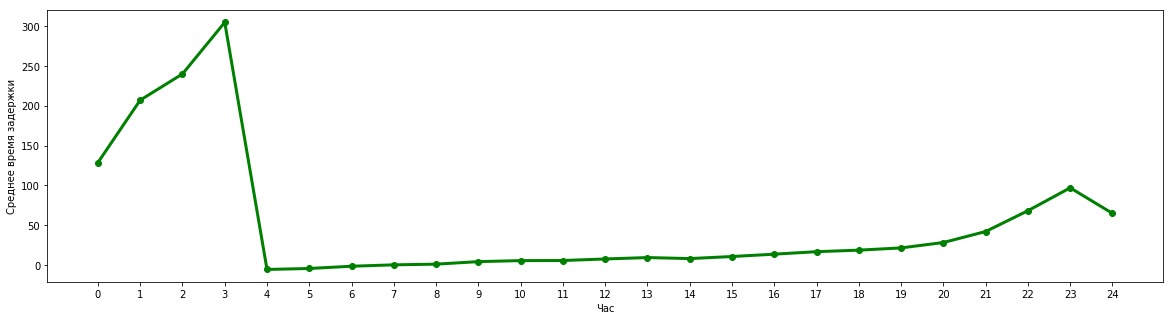

In [26]:
grouped_data = pd.DataFrame(df.groupby([df.hour])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (20,5))
plt.plot(grouped_data.hour, grouped_data.mean_delay_dep, '-o', c='green', linewidth=3)
plt.xticks(range(0, 25))
plt.ylabel('Среднее время задержки')
plt.xlabel('Час')
plt.show()

Из графика видно, что чаще всего задерживают рейсы в ночное время с 22:00 до 3:00. 

2)Рассмотрим среднее время задержки по дням недели

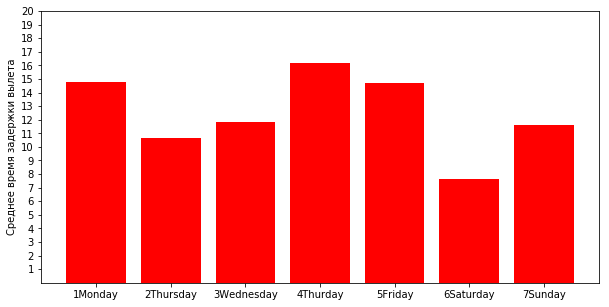

In [95]:
dweek['Date'] = dweek['year'].astype(str) + '-' + dweek['month'].astype(str) + '-' + dweek['day'].astype(str)
dweek['Date'] = pd.to_datetime(dweek['Date'])
dweek['day_w'] = dweek['Date'].dt.dayofweek
days = ["1Monday","2Thursday", "3Wednesday", "4Thurday","5Friday", "6Saturday", "7Sunday"]
dweek['day_w'] = dweek['day_w'].apply(lambda x: days[x])
grouped_data = pd.DataFrame(dweek.groupby([dweek.day_w])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (10, 5))
plt.bar(grouped_data.day_w, grouped_data.mean_delay_dep, color='r')
plt.xticks(range(0, 7))
plt.yticks(range(1, 21))
plt.ylabel('Среднее время задержки вылета')
plt.xlabel('')
plt.show()

В четверг и пятницу мы видим большие задержки. Скорее всего это связано с тем, что люди в эти дни чаще летают, чтобы уехать на выходные.

3)Рассмотри время задержки по месяцам

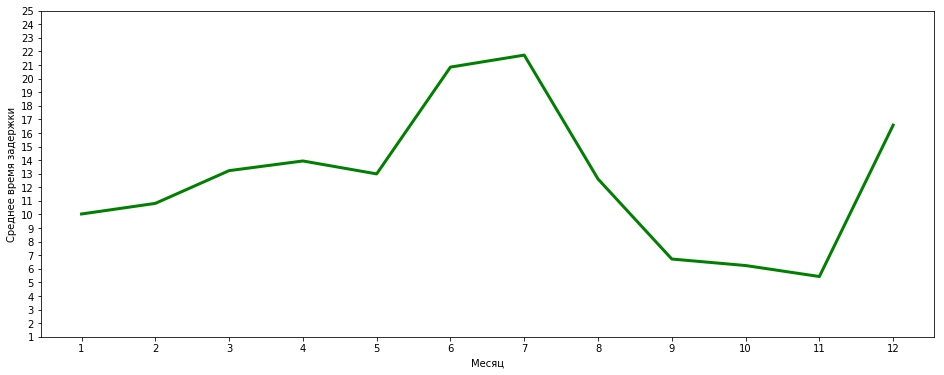

In [37]:
grouped_data = pd.DataFrame(df.groupby([df.month])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (16, 6))
plt.plot(grouped_data.month, grouped_data.mean_delay_dep, color='green', linewidth=3)
plt.xticks(range(1, 13))
plt.yticks(range(1, 26))
plt.ylabel('Среднее время задержки')
plt.xlabel('Месяц')
plt.show()

Из графика видно, что большая задержка в предновогодний месяц и летние  месяцы, в эти периоды люди как раз ездят больше отдыхать.

4)Рассмотрим зависимость задержки от количества росы в этот день

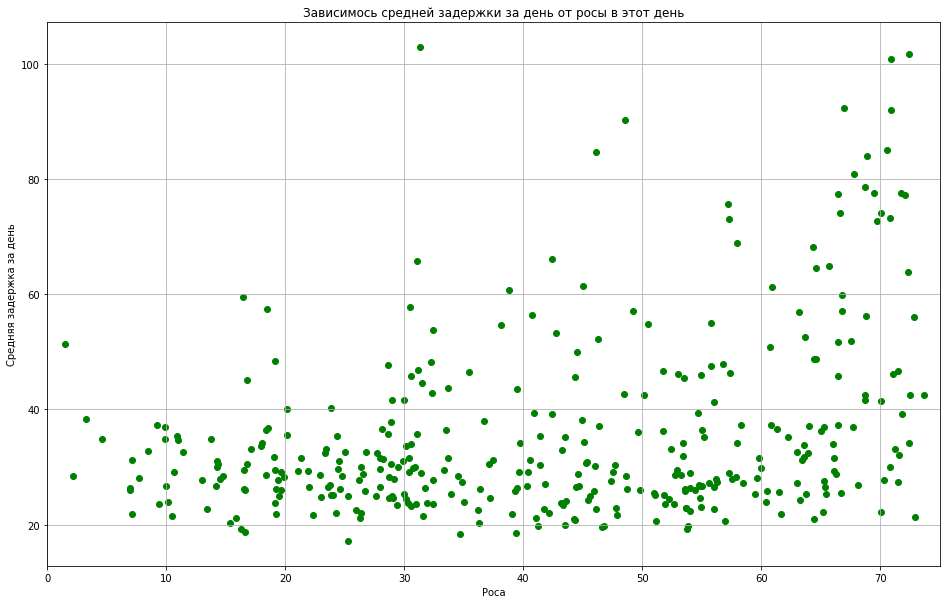

In [120]:
a=dfNew[['dep_delay', 'year','month','day']]
a = a[a['dep_delay'] > 0]
a = a.groupby([a.year, a.month, a.day]).mean()
df1 = dw[['dewp', 'year' ,'month','day']]
df1 = df1.groupby([df1.year, df1.month , df1.day]).mean()
mt = pd.merge(dL, df1, on = ['year','month','day'])
mt = mt.sort_values(by = 'dewp')
amt = np.array(mt['dep_delay'])
bmt = np.array(mt['dewp'])
plt.figure(figsize = (16, 10))
plt.scatter(bmt, amt, color = 'green')
plt.title('Зависимось средней задержки за день от росы в этот день')
plt.xlabel('Роса')
plt.ylabel('Средняя задержка за день')
plt.xlim(0, 75)
grid1 = plt.grid(True)
plt.show()

Заметим, что при показателях росы от 0 до 15 задержки минимальные. А при показателях росы от 65 до 75 среднее значение задержки достаточно большое. Можем сделать вывод, что при плохой погоде рейсы задерживают на дольше.

5)Рассмотрим зависимотсть задержки от влажности

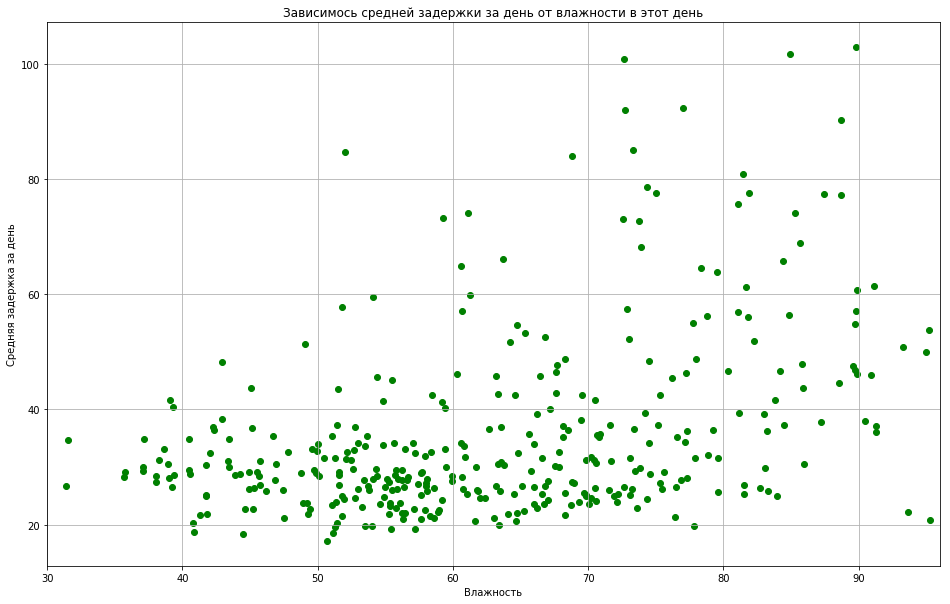

In [121]:
a=dfNew[['dep_delay', 'year','month','day']]
a = a[a['dep_delay'] > 0] 
a = a.groupby([a.year, a.month, a.day]).mean()
df1 = dw[['humid', 'year' ,'month','day']]
df1 = df1.groupby([df1.year, df1.month , df1.day]).mean()
mt = pd.merge(a, df1, on = ['year','month','day'])
mt = mt.sort_values(by = 'humid')
amt = np.array(mt['dep_delay'])
bmt = np.array(mt['humid'])
plt.figure(figsize = (16, 10))
plt.scatter(bmt, amt, color = 'green')
plt.title('Зависимось средней задержки за день от влажности в этот день')
plt.xlabel('Влажность')
plt.ylabel('Средняя задержка за день')
plt.xlim(30, 96)
grid1 = plt.grid(True)
plt.show()

На этом графике мы так же можем наблюдать, что чем выше влажность, тем больше время задержки. То есть во время непогоды самолеты задерживаются на дольше.

6)Рассмотрим зависимость видимости от влажности воздуха

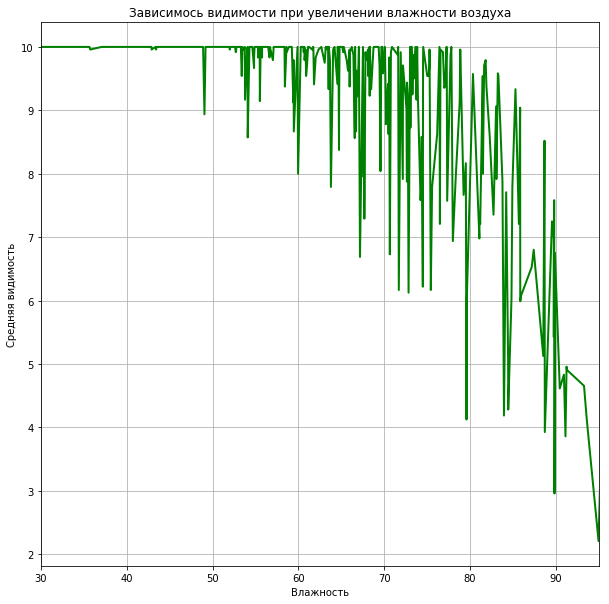

In [122]:
dH = dw[['humid', 'year' ,'month','day']]
dH = dH.groupby([dH.year, dH.month , dH.day]).mean()
df1=dw[['visib', 'year','month','day']]
df1 = df1[df1['visib'] > 0]
df1 = df1.groupby([df1.year, df1.month, df1.day]).mean()
mt5 = pd.merge(df1, dH, on = ['year','month','day']).sort_values(by = 'humid')
A1 = np.array(mt5['visib'])
b1 = np.array(mt5['humid'])
plt.figure(figsize = (10, 10))
plt.plot(b1, A1, lw = 2, color = 'g')
plt.title('Зависимось видимости при увеличении влажности воздуха')
plt.xlabel('Влажность')
plt.ylabel('Средняя видимость')
plt.xlim(30, 95)
grid1 = plt.grid(True)
plt.show()

Из графика мы можем видеть, что при увелечении влажности уменьшается видимость. То есть, чем хуже погода, тем хуже видимость у самолета.

7)Рассмотрим зависимость среднего числа задержек от скорости ветра

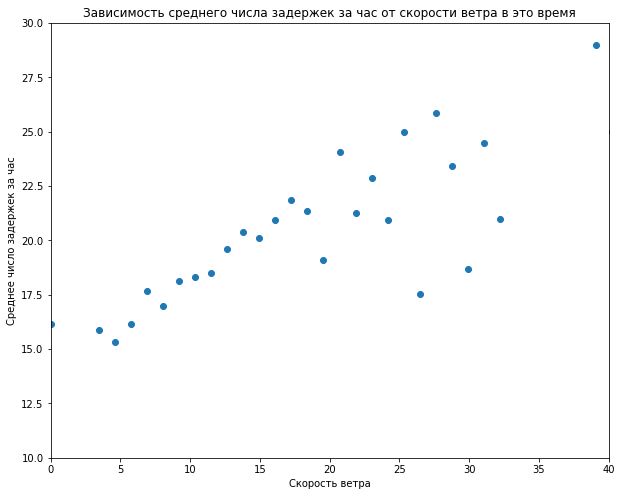

In [123]:
df1=dfNew[['dep_delay', 'year','month','day','hour']]
df1 = df1[df1['dep_delay'] > 0]
df1 = pd.DataFrame(df1.groupby([df1.year, df1.month, df1.day, df1.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['wind_speed', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df1_3.head(20)
mt3 = pd.merge(df1, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.wind_speed).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['wind_speed'])
plt.figure(figsize = (10, 8))
plt.scatter(bmt3, amt3)
plt.xlim(0, 40)
plt.ylim(10, 30)
plt.ylabel('Среднее число задержек за час')
plt.xlabel('Скорость ветра')
plt.title('Зависимость среднего числа задержек за час от скорости ветра в это время')
plt.show()

Мы видим, что чем больше скорость ветра, тем чаще самолет задерживают. Из-за сильного ветра опасно летать на самолете, поэтому часто ждут лучшую погоду.

8)Рассмотрим зависимость среднего числа задержек от видимости

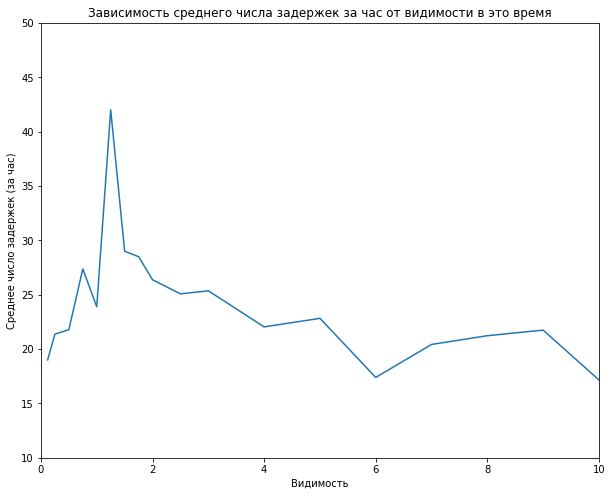

In [124]:
df1=dfNew[['dep_delay', 'year','month','day','hour']]
df1 = df1[df1['dep_delay'] > 0]
df1 = pd.DataFrame(df1.groupby([df1.year, df1.month, df1.day, df1.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['visib', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df1_3.head(20)
mt3 = pd.merge(df1, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.visib).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['visib'])
plt.figure(figsize = (10, 8))
plt.plot(bmt3, amt3)
plt.xlim(0, 10)
plt.ylim(10, 50)
plt.ylabel('Среднее число задержек (за час)')
plt.xlabel('Видимость')
plt.title('Зависимость среднего числа задержек за час от видимости в это время')
plt.show()

Из графика мы можем сделать вывод о том, что чем хуже видимость, тем чаще задерживают самолет. Делают это скорее всего для того, чтобы предотвратить аварии.

9)Зависимость среднего числа задержек от порывов ветра

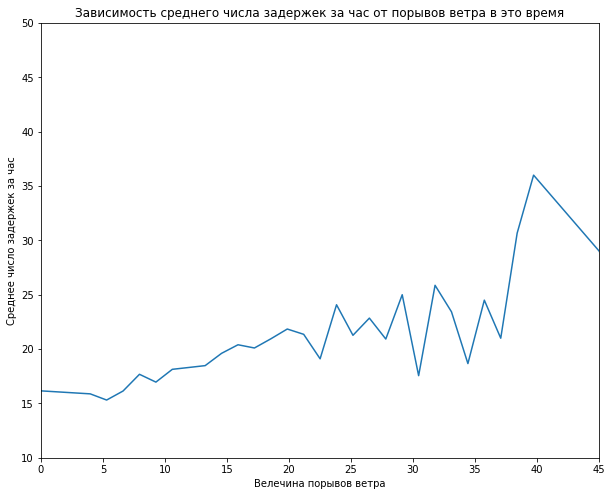

In [127]:
df1=dfNew[['dep_delay', 'year','month','day','hour']]
df1 = df1[df1['dep_delay'] > 0]
df1 = pd.DataFrame(df1.groupby([df1.year, df1.month, df1.day, df1.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['wind_gust', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df1_3.head(20)
mt3 = pd.merge(df1, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.wind_gust).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['wind_gust'])
plt.figure(figsize = (10, 8))
plt.plot(bmt3, amt3)
plt.xlim(0, 45)
plt.ylim(10, 50)
plt.ylabel('Среднее число задержек за час')
plt.xlabel('Велечина порывов ветра')
plt.title('Зависимость среднего числа задержек за час от порывов ветра в это время')
plt.show()

Из графика мы можем сделать вывод, что чем больше порывы ветра, тем чаще самолет задерживают. Скорее всего это тоже сделано для того, чтобы предотвратить аварии.

10)Рассмотрим зависимость среднего числа задержек от температуры

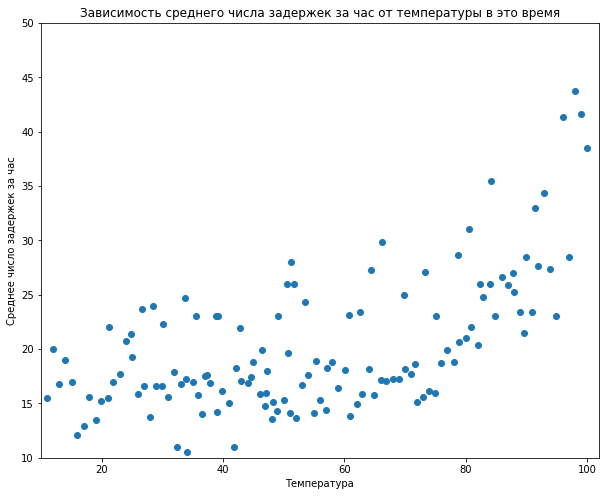

In [128]:
df1=dfNew[['dep_delay', 'year','month','day','hour']]
df1 = df1[df1['dep_delay'] > 0]
df1 = pd.DataFrame(df1.groupby([df1.year, df1.month, df1.day, df1.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['temp', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df1_3.head(20)
mt3 = pd.merge(df1, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.temp).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['temp'])
plt.figure(figsize = (10, 8))
plt.scatter(bmt3, amt3)
plt.xlim(10, 102)
plt.ylim(10, 50)
plt.ylabel('Среднее число задержек за час')
plt.xlabel('Температура')
plt.title('Зависимость среднего числа задержек за час от температуры в это время')
plt.show()

Из графика мы можем сделать вывод, что чем больше температура, тем чаще самолет задерживают. 
Из графиков выше мы видим, что задержки самолетов во многом зависят от погодных условий. Руководству аэропорта нужно подумать над этим и принять необходимые меры, чтобы самолеты реже задерживали.